# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
query_url = f"{url}{weather_api_key}&q="
print(query_url)

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        city_name.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        print(f"Processing Record for {city}")
    except KeyError:
        print("City not valid/found")
print("All cities processed")

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d2efa2a8b32e43a0906b5af9748e29e&q=
Processing Record for arraial do cabo
Processing Record for moyo
Processing Record for dhidhdhoo
Processing Record for banyo
Processing Record for upernavik
Processing Record for saint-joseph
Processing Record for new norfolk
Processing Record for longyearbyen
Processing Record for bluff
Processing Record for kristiansund
Processing Record for maningrida
Processing Record for georgetown
Processing Record for linjiang
Processing Record for vaini
Processing Record for bayanday
Processing Record for lakota
Processing Record for albany
Processing Record for punta arenas
City not valid/found
Processing Record for asau
Processing Record for puerto ayora
Processing Record for khatanga
Processing Record for kulhudhuffushi
City not valid/found
Processing Record for provideniya
City not valid/found
Processing Record for busselton
City not valid/found
Processing Record for esperance
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dict = {
    "City":city_name,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date
}

In [31]:
#Display the DataFrame
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial do Cabo,-22.9661,-42.0278,69.40,76,0,24.00,BR,1627182556
1,Moyo,3.6609,31.7247,62.60,94,99,2.35,UG,1627182556
2,Dhidhdhoo,6.8833,73.1000,78.17,92,100,24.83,MV,1627182557
3,Banyo,6.7500,11.8167,64.15,97,91,2.33,CM,1627182557
4,Upernavik,72.7868,-56.1549,39.13,86,8,2.33,GL,1627182557


In [32]:
#Export the city data into a .csv.
weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [33]:
weather_df.drop(weather_df[weather_df['Humidity'] > 100].index, inplace = True)

In [34]:
#  Get the indices of cities that have humidity over 100%.
very_humid_city = weather_df.loc[weather_df['Humidity'] > 100]
#No cities have over >100 humidity

In [35]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

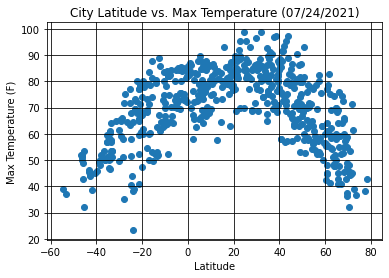

In [36]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature (07/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(color="black")
plt.savefig("Figures/lat_and_temp_plot.png")
plt.show()

## Latitude vs. Humidity Plot

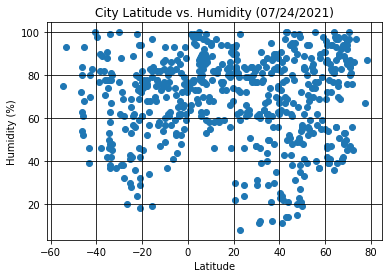

In [37]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"])
plt.title("City Latitude vs. Humidity (07/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color="black")
plt.savefig("Figures/lat_and_humidity_plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

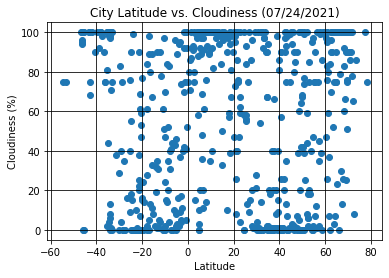

In [38]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness (07/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (color="black")
plt.savefig("Figures/lat_and_cloud_plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

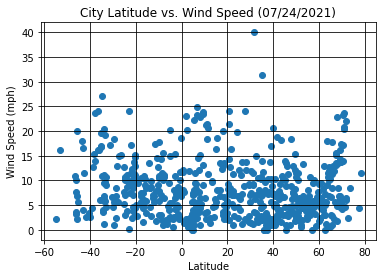

In [39]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed (07/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (color="black")
plt.savefig("Figures/lat_and_wind_plot.png")
plt.show()

## Linear Regression

In [99]:
weather_df[weather_df['Lat'] >=0]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Moyo,3.6609,31.7247,62.60,94,99,2.35,UG,1627182556
2,Dhidhdhoo,6.8833,73.1000,78.17,92,100,24.83,MV,1627182557
3,Banyo,6.7500,11.8167,64.15,97,91,2.33,CM,1627182557
4,Upernavik,72.7868,-56.1549,39.13,86,8,2.33,GL,1627182557
7,Longyearbyen,78.2186,15.6401,42.64,87,75,11.50,SJ,1627182558
...,...,...,...,...,...,...,...,...,...
569,Narasannapeta,18.4167,84.0500,86.40,66,100,5.01,IN,1627182684
570,Les Cayes,18.2000,-73.7500,78.80,86,99,2.93,HT,1627182684
572,Monrovia,6.3005,-10.7969,76.51,77,100,8.21,LR,1627182685
573,Ati,13.2154,18.3353,84.04,59,100,9.62,TD,1627182685


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [101]:
north_hem = weather_df[weather_df['Lat'] >=0]

The r-value is: 0.054827288234775784


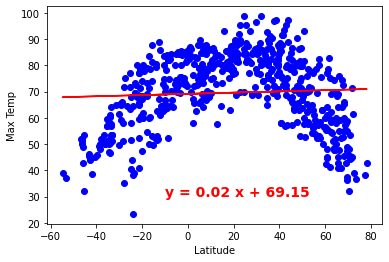

In [103]:
# print(f"The r-value is: {rvalue}")         
# x_values = weather_df['Lat']
# y_values = weather_df["Max Temp"]
# (slope, intercept,rvalue, pvalue, stderr) = linregress(weather_df['Lat'],weather_df["Max Temp"])
# regress_values = weather_df['Lat']* slope + intercept
# line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],color='b')
plt.plot(weather_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-10,30), fontsize=14, color="red",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

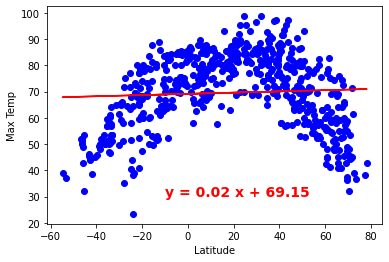

In [108]:
# print(f"The r-value is: {rvalue}")         
# x_values = weather_df['Lat']
# y_values = weather_df["Max Temp"]
# (slope, intercept,rvalue, pvalue, stderr) = linregress(weather_df['Lat'],weather_df["Max Temp"])
# regress_values = weather_df['Lat']* slope + intercept
# line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],color='b')
plt.plot(weather_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-10,30), fontsize=14, color="red",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

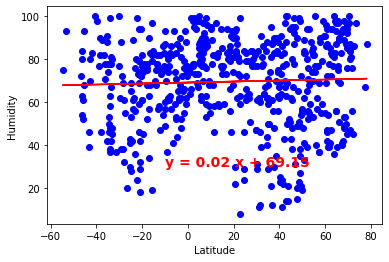

In [109]:
# print(f"The r-value is: {rvalue}")         
# x_values = weather_df['Lat']
# y_values = weather_df["Max Temp"]
# (slope, intercept,rvalue, pvalue, stderr) = linregress(weather_df['Lat'],weather_df["Max Temp"])
# regress_values = weather_df['Lat']* slope + intercept
# line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(weather_df["Lat"],weather_df["Humidity"],color='b')
plt.plot(weather_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-10,30), fontsize=14, color="red",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

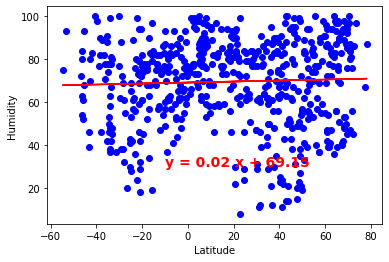

In [110]:
# print(f"The r-value is: {rvalue}")         
# x_values = weather_df['Lat']
# y_values = weather_df["Max Temp"]
# (slope, intercept,rvalue, pvalue, stderr) = linregress(weather_df['Lat'],weather_df["Max Temp"])
# regress_values = weather_df['Lat']* slope + intercept
# line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(weather_df["Lat"],weather_df["Humidity"],color='b')
plt.plot(weather_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-10,30), fontsize=14, color="red",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

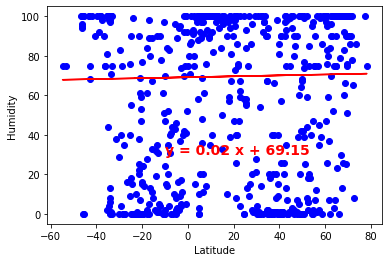

In [111]:
# print(f"The r-value is: {rvalue}")         
# x_values = weather_df['Lat']
# y_values = weather_df["Max Temp"]
# (slope, intercept,rvalue, pvalue, stderr) = linregress(weather_df['Lat'],weather_df["Max Temp"])
# regress_values = weather_df['Lat']* slope + intercept
# line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],color='b')
plt.plot(weather_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-10,30), fontsize=14, color="red",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

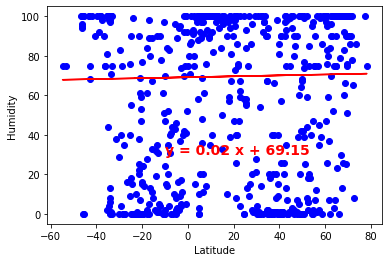

In [112]:
# print(f"The r-value is: {rvalue}")         
# x_values = weather_df['Lat']
# y_values = weather_df["Max Temp"]
# (slope, intercept,rvalue, pvalue, stderr) = linregress(weather_df['Lat'],weather_df["Max Temp"])
# regress_values = weather_df['Lat']* slope + intercept
# line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],color='b')
plt.plot(weather_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-10,30), fontsize=14, color="red",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

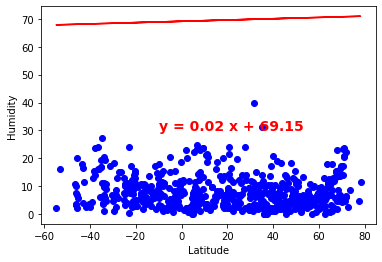

In [113]:
# print(f"The r-value is: {rvalue}")         
# x_values = weather_df['Lat']
# y_values = weather_df["Max Temp"]
# (slope, intercept,rvalue, pvalue, stderr) = linregress(weather_df['Lat'],weather_df["Max Temp"])
# regress_values = weather_df['Lat']* slope + intercept
# line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],color='b')
plt.plot(weather_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-10,30), fontsize=14, color="red",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

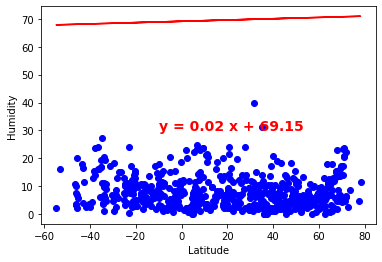

In [114]:
# print(f"The r-value is: {rvalue}")         
# x_values = weather_df['Lat']
# y_values = weather_df["Max Temp"]
# (slope, intercept,rvalue, pvalue, stderr) = linregress(weather_df['Lat'],weather_df["Max Temp"])
# regress_values = weather_df['Lat']* slope + intercept
# line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],color='b')
plt.plot(weather_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-10,30), fontsize=14, color="red",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()